# Wild BlueBerry Yield Predictions


Submissions will be evaluated using Mean Absolute Error (MAE)

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


In [2]:
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')
df.head(10)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205
9,9,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.381768,28.763565,3519.43131


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15289.0,7644.000000,4413.698468,0.000000,3822.000000,7644.000000,11466.000000,15288.000000
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000


In [6]:
df.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [7]:
df.shape

(15289, 18)

Learn some more exploratory vizualization for numerical variables

## Feature selection using Correlation matrix

<AxesSubplot: >

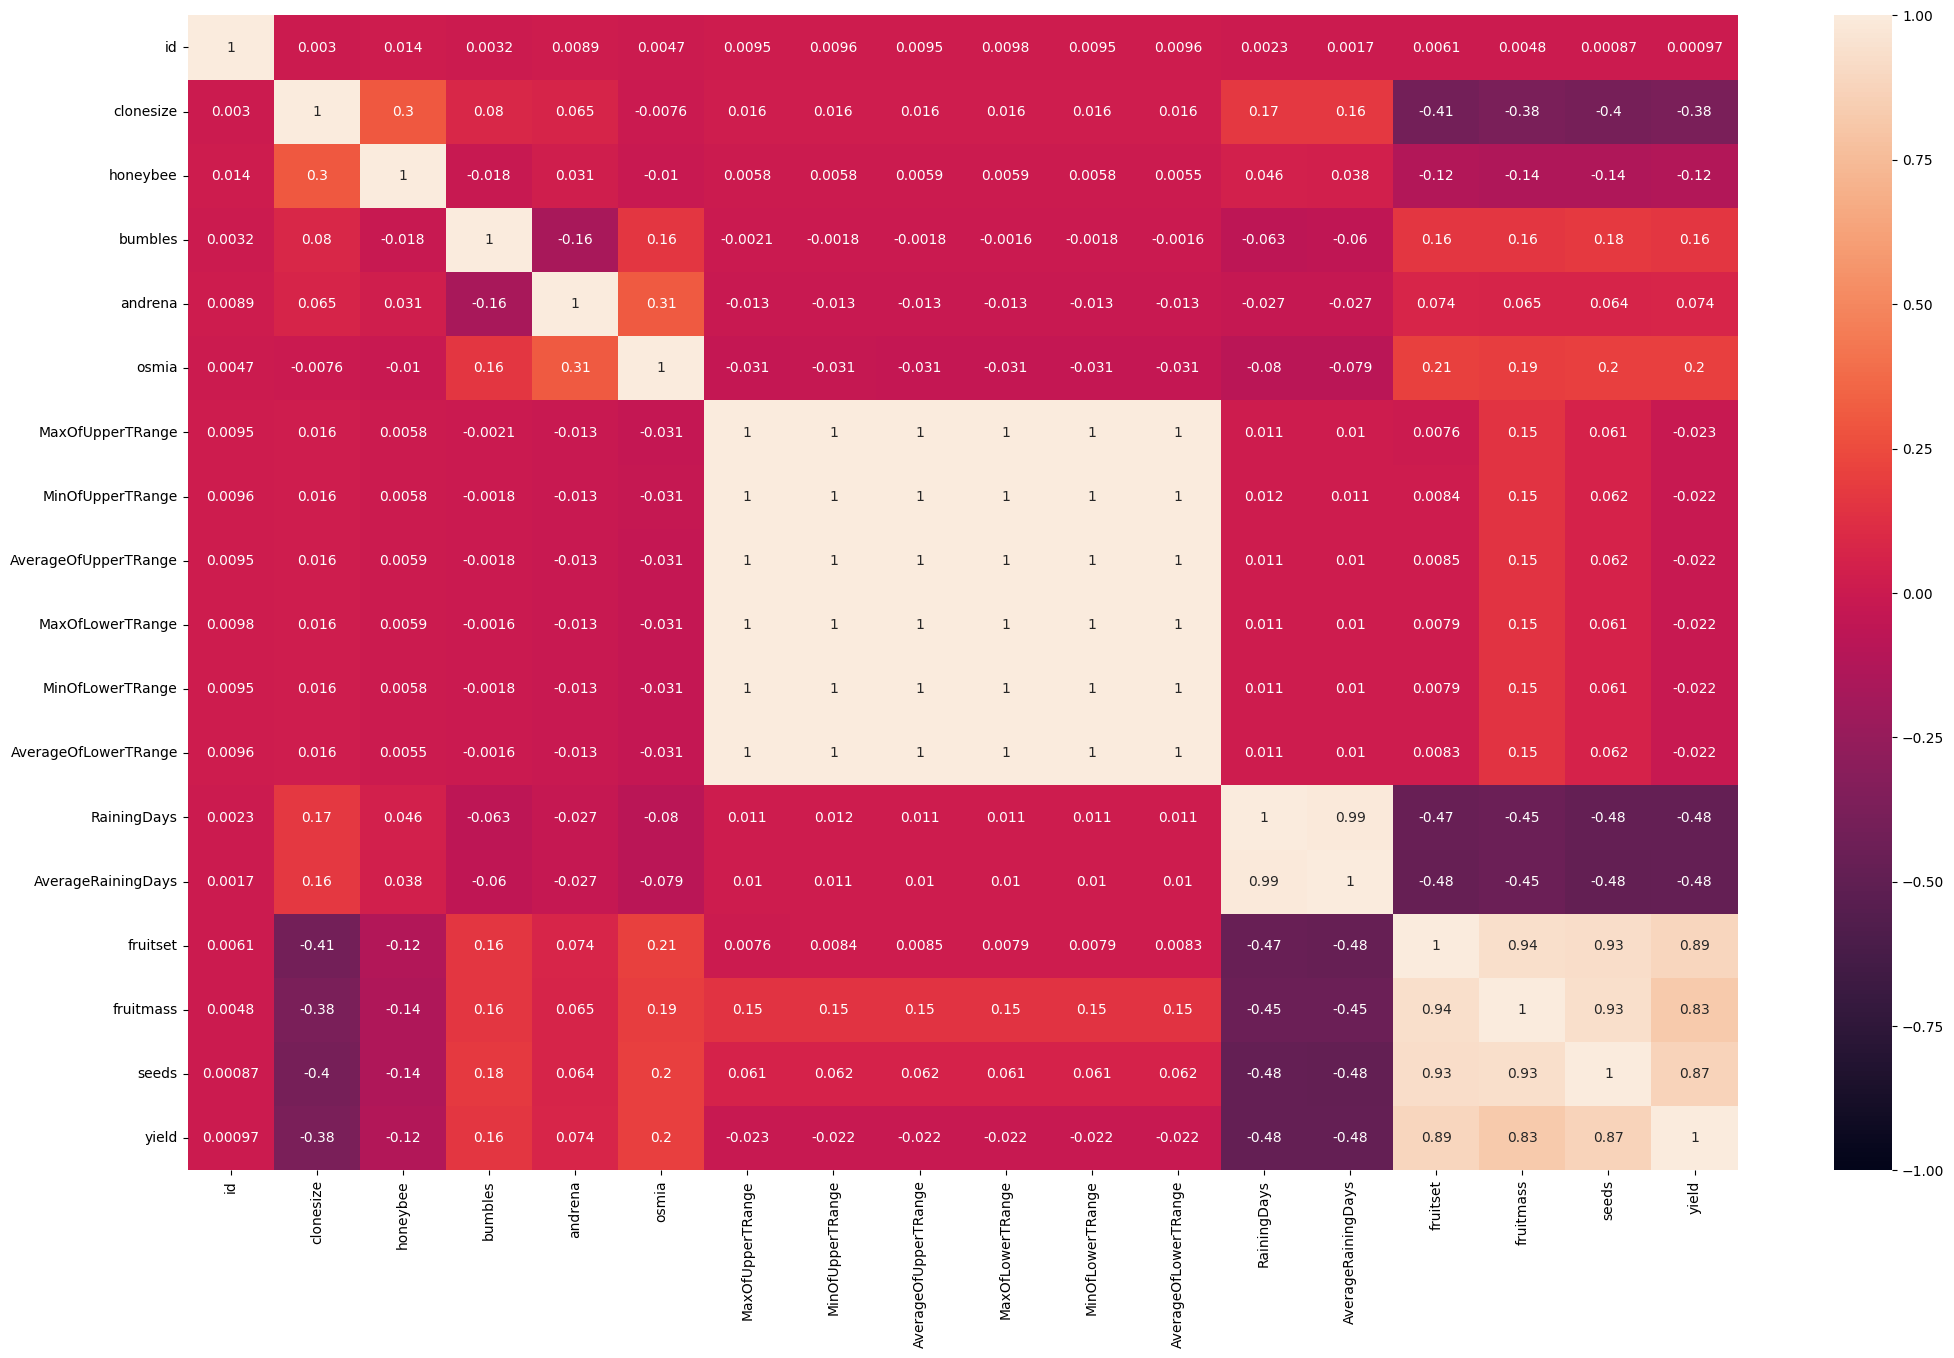

In [8]:
f,ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

There are few columns which has perfect co-linearity,
Delete these columns

In [9]:
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df_new = df.drop(df[to_drop], axis=1)
test_new = test.drop(test[to_drop], axis=1)

df_new.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.579677,0.494165,40.484512,7479.93417


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_new.drop(['yield'],axis=1),df_new['yield'])
X_train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,fruitmass,seeds
7794,7794,25.0,0.50,0.25,0.38,0.63,77.4,16.0,0.536900,0.467853,38.653509
2444,2444,25.0,0.50,0.25,0.63,0.50,86.0,1.0,0.511481,0.454080,37.440449
3931,3931,12.5,0.25,0.25,0.38,0.75,69.7,1.0,0.574708,0.469893,39.988734
15264,15264,12.5,0.25,0.25,0.63,0.50,86.0,1.0,0.584921,0.486815,40.370193
4323,4323,25.0,0.50,0.25,0.38,0.50,94.6,16.0,0.561886,0.479607,39.501881


## 1. Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_percentage_error
import math
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

results = pd.DataFrame([['Linear Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.06654,348539.25045,0.809118,590.372129


In [13]:
## 2. RidgeCV Regression

# from sklearn.linear_model import Ridge

# ridreg = Ridge(random_state=3)
# ridreg.fit(X_train,y_train)
# y_pred = ridreg.predict(X_test)

# mae = metrics.mean_absolute_error(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
# r2 = metrics.r2_score(y_test, y_pred)
# rmse = math.sqrt(mse)

# temp_results = pd.DataFrame([['Ridge Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
# results = pd.concat([results,temp_results], ignore_index=True) 
# results

## 2. RidgeCV regession

In [14]:
from sklearn.linear_model import RidgeCV
alphas = [0.1,0.3,0.5,0.7,0.9,1.0]
ridregcv = RidgeCV(alphas = alphas)
ridregcv.fit(X_train,y_train)
y_pred = ridregcv.predict(X_test)

In [15]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['Ridge CV Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,348539.250450,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,348576.327256,0.809098,590.403529


## 3. Lasso Regression

In [16]:
from sklearn.linear_model import LassoCV

alphas = [0.1,0.3,0.5,0.7,0.9,1.0]
lassocv = LassoCV(alphas=alphas,cv=10,random_state=3,)
lassocv.fit(X_train,y_train)
y_pred = lassocv.predict(X_test)

In [17]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['Lasso Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,348539.250450,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,348576.327256,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,348717.957516,0.809020,590.523461


## 4.Elastic Net Regression

In [18]:
from sklearn.linear_model import ElasticNetCV
ela_reg = ElasticNetCV(cv =10,random_state =3)
ela_reg.fit(X_train,y_train)
y_pred = ela_reg.predict(X_test)

In [19]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['ElasticNetCV Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,348539.250450,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,348576.327256,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,348717.957516,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,876815.066589,0.519801,936.384038


## 5. Support Vector Regression

In [20]:
from sklearn.svm import SVR

svr_reg = SVR()
svr_reg.fit(X_train,y_train)
y_pred = svr_reg.predict(X_test)

In [21]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['Support Vector Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187


## 6. Decision Tree Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=3)
dt_reg.fit(X_train,y_train)
y_pred = dt_reg.predict(X_test)

In [23]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['Decision Tree Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187
5,Decision Tree Regression,531.537727,0.093867,7.005332e+05,0.616344,836.978594


## 7. Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor
ranfor_reg = RandomForestRegressor(max_depth=2, random_state=3)
ranfor_reg.fit(X_train,y_train)
y_pred = ranfor_reg.predict(X_test)

In [25]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['Random Forest Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187
5,Decision Tree Regression,531.537727,0.093867,7.005332e+05,0.616344,836.978594
6,Random Forest Regression,476.724418,0.088170,4.650179e+05,0.745327,681.922238


## 8. Xgboost Regressor

In [26]:
import xgboost as xgb
xbg_reg = xgb.XGBRegressor()
xbg_reg.fit(X_train,y_train)
y_pred = xbg_reg.predict(X_test)

In [27]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['XGB Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187
5,Decision Tree Regression,531.537727,0.093867,7.005332e+05,0.616344,836.978594
6,Random Forest Regression,476.724418,0.088170,4.650179e+05,0.745327,681.922238
7,XGB Regression,366.258016,0.065761,3.400084e+05,0.813790,583.102404


## 9. LightGBM Regression

In [28]:
from lightgbm import LGBMRegressor
lgb_reg = LGBMRegressor()
lgb_reg.fit(X_train,y_train)
y_pred = lgb_reg.predict(X_test)

In [29]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['LGBM Regressor', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187
5,Decision Tree Regression,531.537727,0.093867,7.005332e+05,0.616344,836.978594
6,Random Forest Regression,476.724418,0.088170,4.650179e+05,0.745327,681.922238
7,XGB Regression,366.258016,0.065761,3.400084e+05,0.813790,583.102404
8,LGBM Regressor,352.459321,0.063037,3.237303e+05,0.822705,568.973006


## 10. CatBoost Regression

In [30]:
import catboost as cb
cb_reg = cb.CatBoostRegressor()
cb_reg.fit(X_train,y_train,verbose=False)
y_pred = cb_reg.predict(X_test)

In [31]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['CatBoost Regressor', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187
5,Decision Tree Regression,531.537727,0.093867,7.005332e+05,0.616344,836.978594
6,Random Forest Regression,476.724418,0.088170,4.650179e+05,0.745327,681.922238
7,XGB Regression,366.258016,0.065761,3.400084e+05,0.813790,583.102404
8,LGBM Regressor,352.459321,0.063037,3.237303e+05,0.822705,568.973006
9,CatBoost Regressor,352.250722,0.063093,3.229476e+05,0.823134,568.284748


## 11. Decision Tree Regressor with GridSearchCV

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='neg_mean_squared_error')

In [33]:
y_pred = grid_search.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['Decision Tree Regressor CV', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187
5,Decision Tree Regression,531.537727,0.093867,7.005332e+05,0.616344,836.978594
6,Random Forest Regression,476.724418,0.088170,4.650179e+05,0.745327,681.922238
7,XGB Regression,366.258016,0.065761,3.400084e+05,0.813790,583.102404
8,LGBM Regressor,352.459321,0.063037,3.237303e+05,0.822705,568.973006
9,CatBoost Regressor,352.250722,0.063093,3.229476e+05,0.823134,568.284748


SO,, after applying 10 Regression base models on our dataset, we can see that **LGBM Regressor** has performed the best, followed closely by **CatBoost Regressor**, and Linear Regression, Ridge Regression, Lasso Regression & XGB Regression also have fairly low score.
So let's Tune Hyperparameters for all these regressions and find the best model

# Hyper Parameter Tuning

## CatBoost Regressor

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200]
}

model = CatBoostRegressor()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',cv=5)

# Set up the cross-validation scheme
cv = 5

# Train and evaluate the model with each combination of hyperparameters
grid.fit(X_train, y_train)

# Get the best hyperparameters from grid search and use them to train a final model
best_params = grid.best_params_
best_catboost = CatBoostRegressor(**best_params)
best_catboost.fit(X_train, y_train)

In [35]:
y_pred = best_catboost.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

temp_results = pd.DataFrame([['Best CatBoost Regression', mae, mape, mse, r2, rmse]], columns=['Model', 'MAE', 'MAPE', 'MSE', 'R2','RMSE'])
results = pd.concat([results,temp_results], ignore_index=True) 
results

,Model,MAE,MAPE,MSE,R2,RMSE
0,Linear Regression,369.661843,0.066540,3.485393e+05,0.809118,590.372129
1,Ridge CV Regression,369.785828,0.066591,3.485763e+05,0.809098,590.403529
2,Lasso Regression,369.814016,0.066591,3.487180e+05,0.809020,590.523461
3,ElasticNetCV Regression,724.442793,0.140578,8.768151e+05,0.519801,936.384038
4,Support Vector Regression,1101.513076,0.216331,1.844379e+06,-0.010097,1358.079187
5,Decision Tree Regression,531.537727,0.093867,7.005332e+05,0.616344,836.978594
6,Random Forest Regression,476.724418,0.088170,4.650179e+05,0.745327,681.922238
7,XGB Regression,366.258016,0.065761,3.400084e+05,0.813790,583.102404
8,LGBM Regressor,352.459321,0.063037,3.237303e+05,0.822705,568.973006
9,CatBoost Regressor,352.250722,0.063093,3.229476e+05,0.823134,568.284748


# Final Model

Catboost Regression

In [36]:
predictions = best_catboost.predict(test_new)

output = pd.DataFrame({'id': test.id, 'yield': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
